# 제3 고지 : 고차 미분 계산
## STEP 28 : 함수 최적화

미분은 다양한 분야에서 다양한 용도로 활용되지만, 그 중 가장 중요한 용도로 **함수 최적화**를 들수 있다.(머신러닝 문제 역시 최적화와 관련이 있다.)  
이번 단계에서는 구체적으로 `로젠브록 함수(Rosenbrock function)`를 대상으로 최적화를 진행해 본다.


### 28.1 로젠브록 함수 (Rosenbrock function)
<p align='center'>
    <img src='../assets/%EA%B7%B8%EB%A6%BC%2028-1-%EC%B6%94%EA%B0%80.png' align='center' width='32%'>
</p>

$$
y=100(x_1-x_0^2)^2+(1-x_0)^2
$$
위의 그림에서 확인할 수 있듯이, '산'에 등고선을 그리면 그 모양이 바나나와 닮아 있다고 하여, `Rosenbrock's banana function` 이라고도 불린다.  
이번 단계의 목표는 **해당 함수의 출력이 최소가 되는 $x_0,x_1$의 값**을 찾는 것이다.  
(참고로, 로젠브록 함수의 올바른 정의는 $y=f(x_0,x_1)=b(x_1-x_0^2)^2+(a-x_0)^2$ 이다. 위의 그림은 $a=1,b=100$ 일 때의 그림이며, 지금 예처럼 설정하여 벤치마크 하는 것이 일반적이다.)



### 28.2 미분 계산하기 
로젠브록 함수의 $(x_0,x_1)=(0.0,2.0)$ 에서의 미분 $\nabla_xf=\begin{bmatrix}\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial x_1}\end{bmatrix}$  을 계산해보자.  
여기서 주목해야할 것은 **gradient** 는  **각 지점에서 함수의 출력을 가장 크게 하는 방향** 을 가리킨다는 것이다. 즉, 반대로 **gradient 에 마이너스를 곱한 방향**은 **출력을 가장 작게 줄여주는 방향**을 뜻하게 된다.


In [13]:
import sys

sys.path.append("..")

import numpy as np
from dezero import Variable

def rosenbrock(x0,x1):
    y = 100 * (x1-x0**2)**2 + (1-x0)**2 
    return y 

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
y = rosenbrock(x0,x1)
y.backward()
print(f"df/dx0 : {x0.grad}, df/dx1 : {x1.grad} ")

df/dx0 : -2.0, df/dx1 : 400.0 


### 28.3 경사하강법 구현
앞서 gradient는 함수의 출력을 가장 크게 하는 방향을 가리킨다고 했다. 하지만 복잡한 형상의 함수라면, 이 방향/반대 방향에 `global maxima/minima`가 존재함을 의미하는 것은 아니다.  
그러나 국소적으로 본다면 gradient를 구하는 작업을 반복하면 점차 원하는 지점으로 접근하리라 기대할 수 있는데, 이를  `gradient descent` 라고 한다.  
(참고로, **어떤 초깃값을 가지냐에 따라 원하는 지점에 빨리 도달 할수도/못할수도 있다**는 것을 알 수 있다.)

이제 `gradient descent` 를 문제에 적용해 **로젠브록 함수가 최솟값을 가지는 $(x_0,x_1)$을 찾아보자.**  
(참고로, **$(x_0,x_1)=(1.0,1.0)$ 에서 최솟값**을 가진다.)



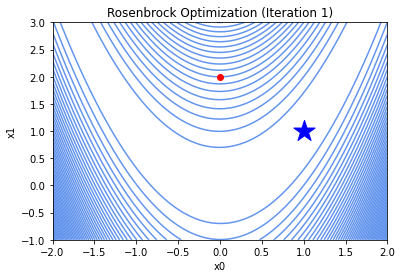

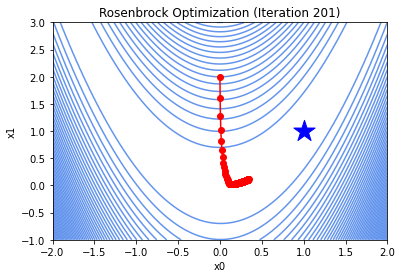

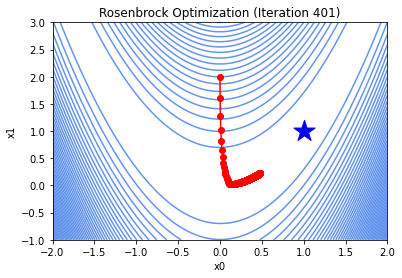

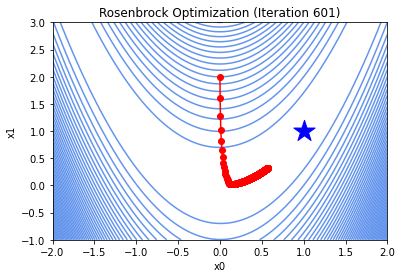

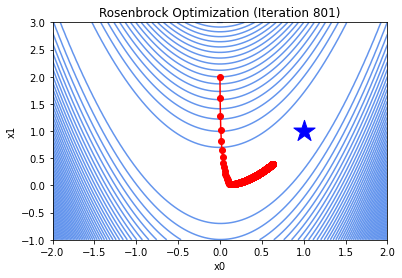

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline

# 초기 포인트 설정
# TODO:  초깃값을 바꿔서 확인해보자 
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

# TODO: 임의로 학습률을 바꿔서 확인해 보자.
lr = 1e-3  # 학습률 

# TODO: 임의로 반복횟수를 바꿔 확인해 보자. 
iters = 1000  # 반복 횟수 

log_interval = 200 # 그래프 인터벌 

# 포인트 이동 정보
x0_history = []  
x1_history = []  

for i in range(iters):
    # 현재 포인트를 이력에 추가
    x0_history.append(x0.data.item())
    x1_history.append(x1.data.item())

    y = rosenbrock(x0, x1)

    # Init grad
    x0.cleargrad()
    x1.cleargrad()

    # backpropagation
    y.backward()

    # gradient descent
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
    
    if i % log_interval ==0:
        # 그래프 업데이트
        plt.clf()
        # Rosenbrock 함수의 등고선 플롯만 그리기
        x0_range = np.linspace(-2, 2, 100)
        x1_range = np.linspace(-1, 3, 100)
        X0,X1= np.meshgrid(x0_range, x1_range)
        Y = rosenbrock(Variable(X0), Variable(X1))
        plt.contour(X0, X1, Y.data, levels=50, colors='cornflowerblue')
            
        # 현재 포인트 표시 및 선으로 연결
        plt.scatter([1.0], [1.0],marker="*", color="blue",s=500) # plotting single point
        plt.plot(x0_history, x1_history, "ro-",)
        plt.xlabel('x0')
        plt.ylabel('x1')
        plt.title(f'Rosenbrock Optimization (Iteration {i+1})')
        
        plt.pause(0.01)  # 잠시 멈춤

plt.show()